In [1]:
from pathlib import Path
import sys
sys.path.append(str(Path.cwd().parent))
from backpropex import Network, NetGraph, TrainingData, FilterNone, Trainer, StepType


## Eval


In [2]:
nn1 = NetGraph(Network(4, 4, 3, 3, 2, 2, output_names=['Odd', 'Even']))

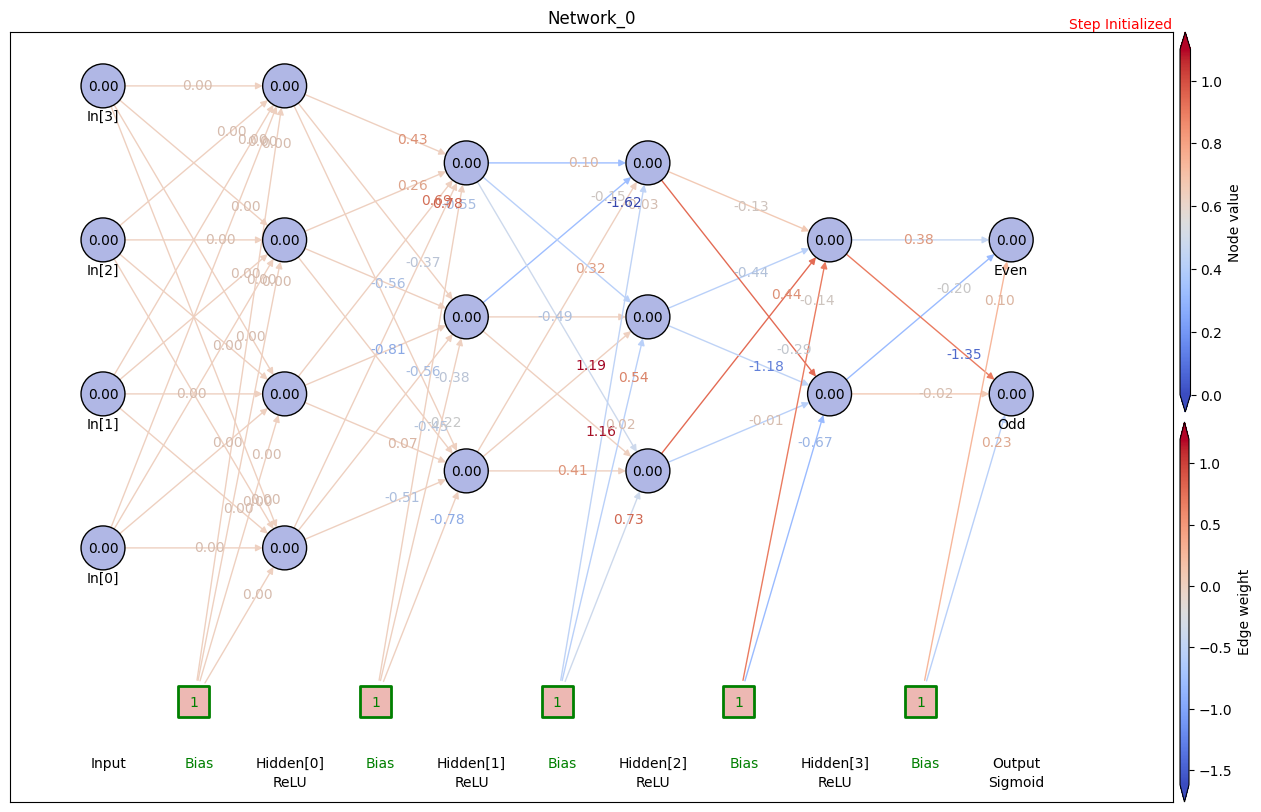

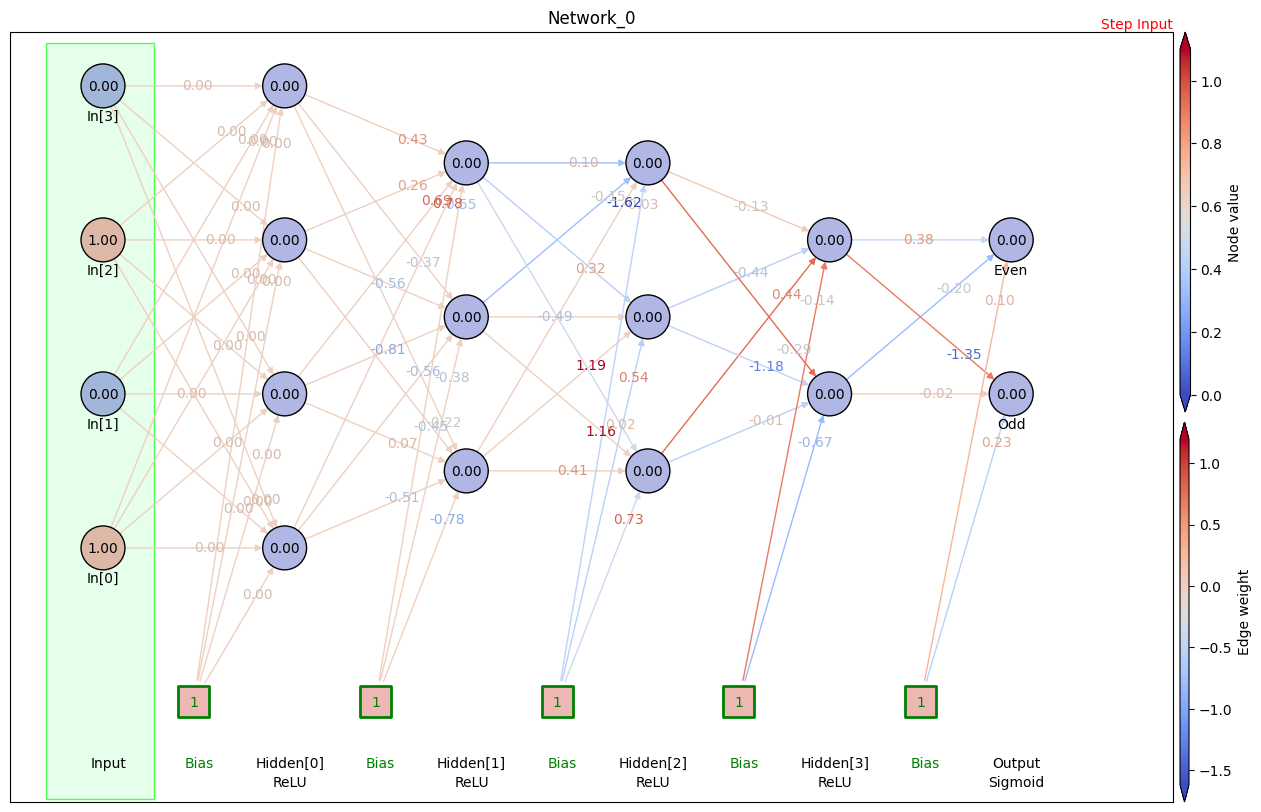

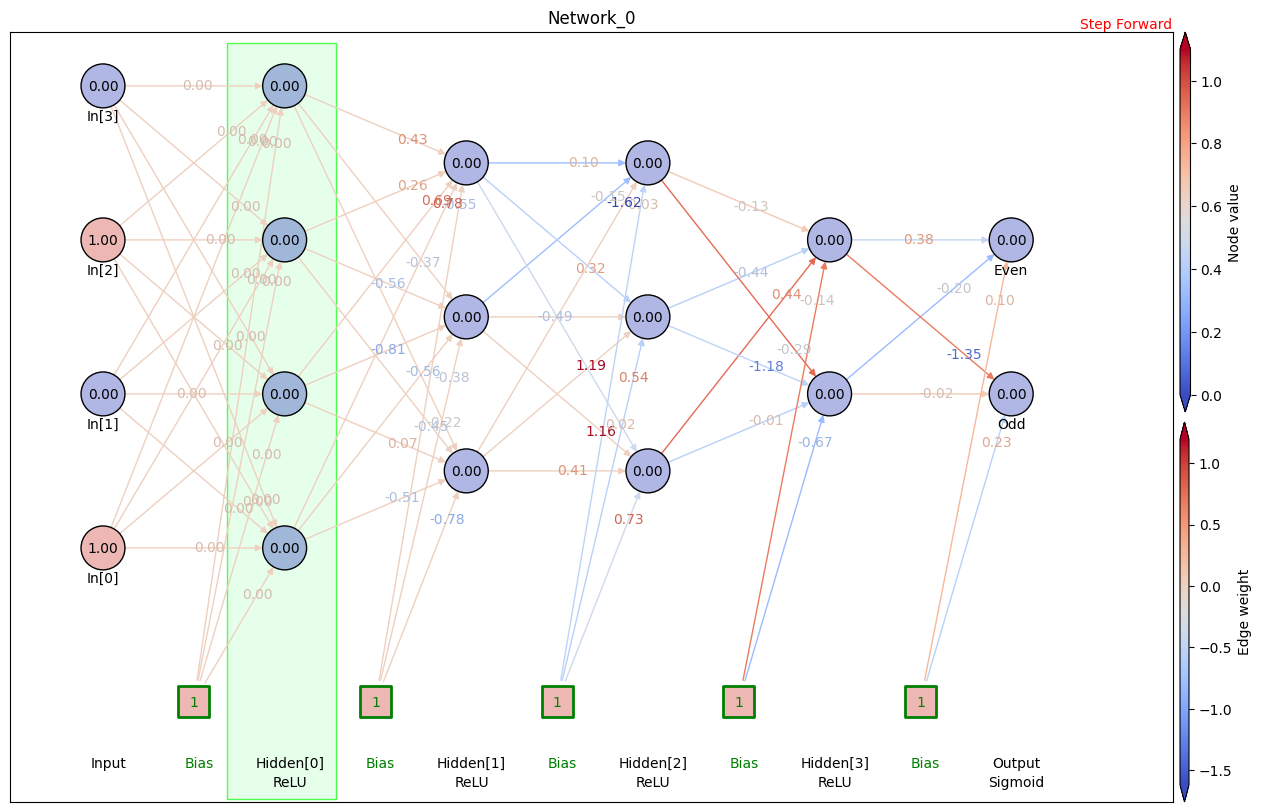

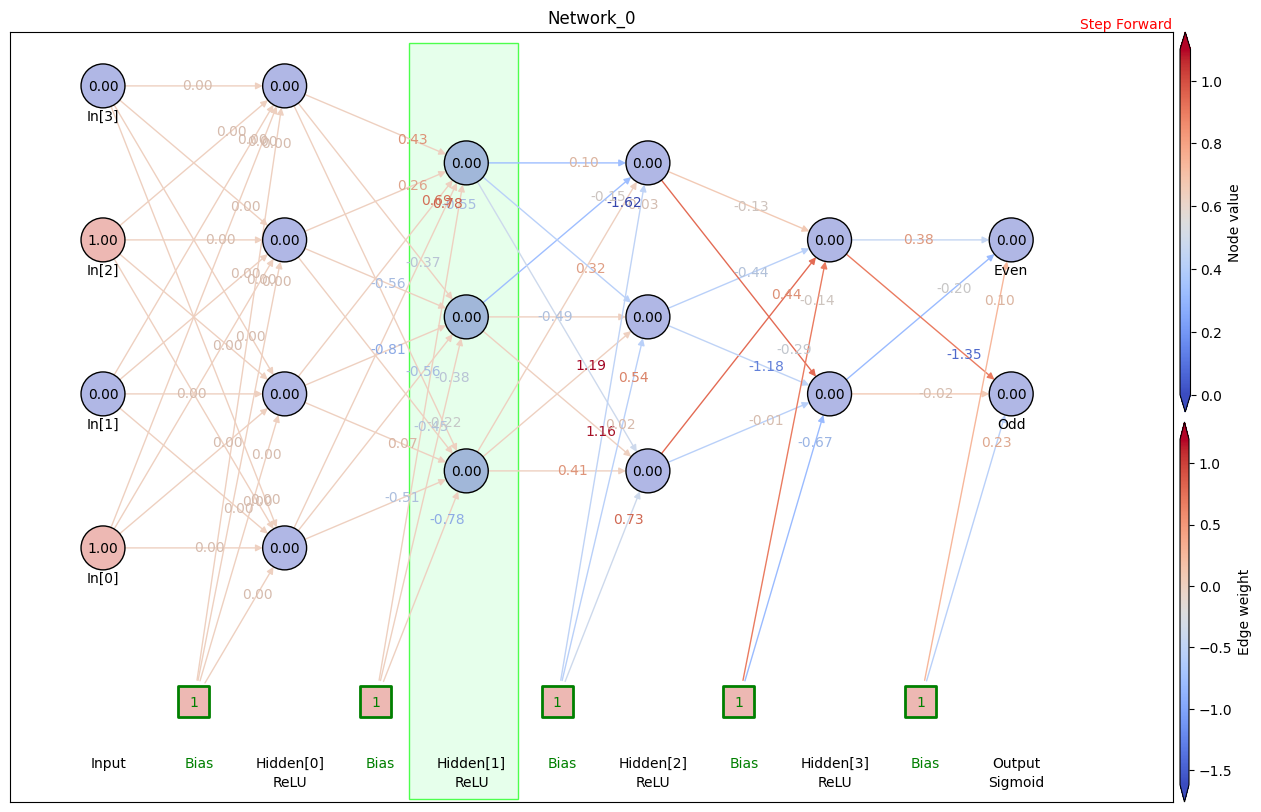

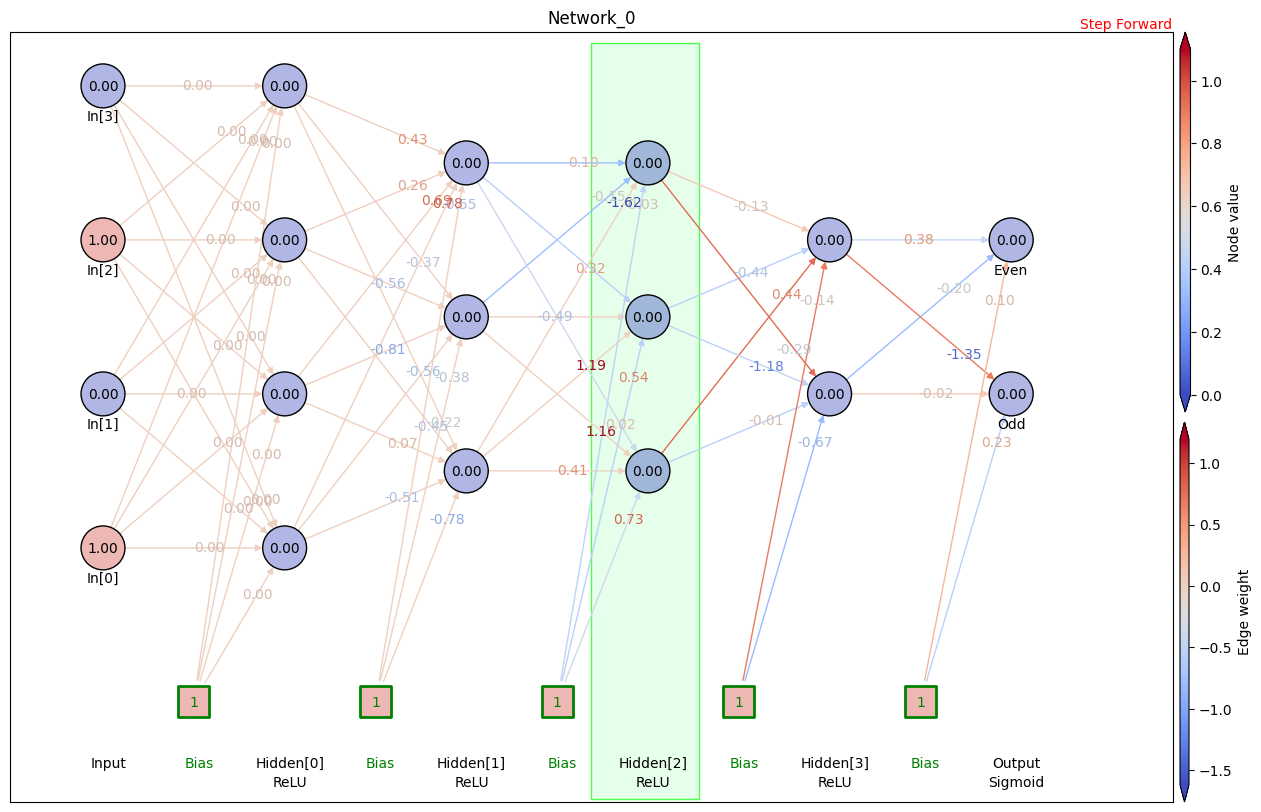

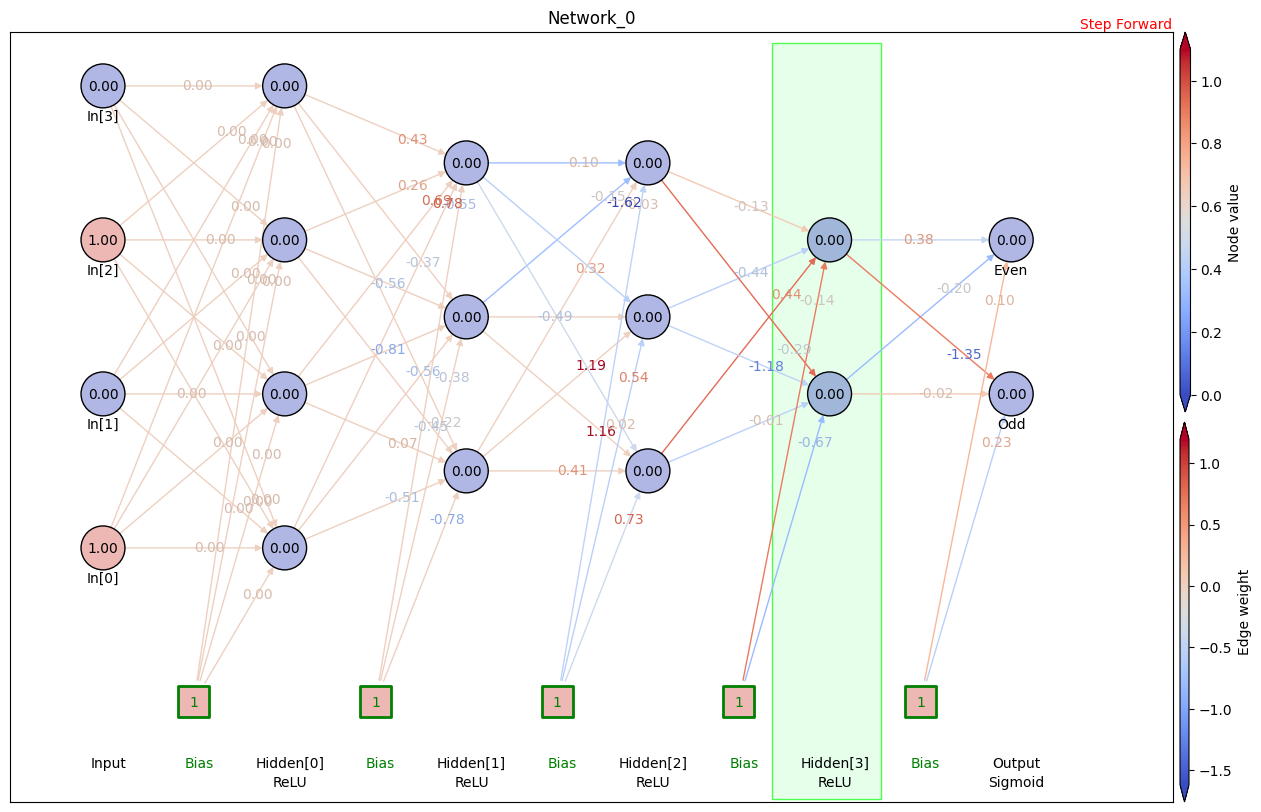

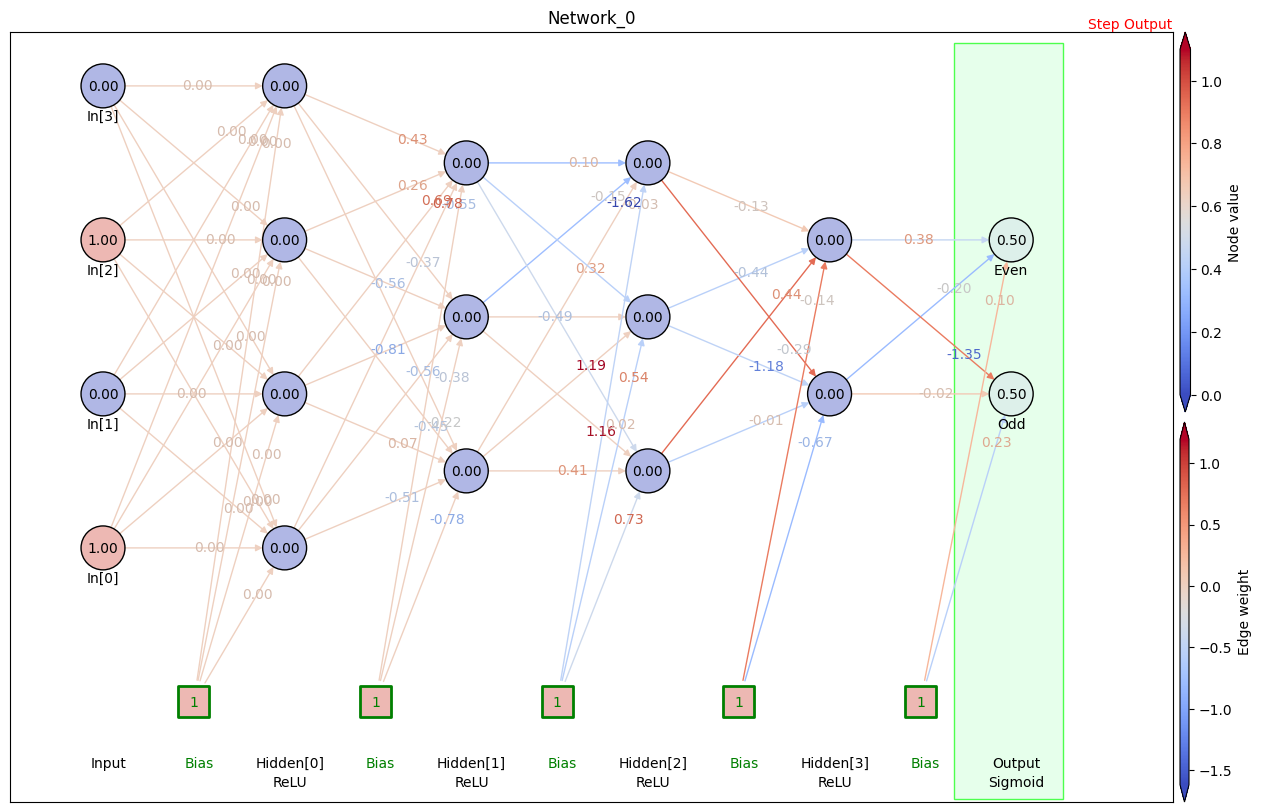

[InitStepResult(type=<StepType.Initialized: 'Initialized'>),
 EvalInputStepResult(type=<StepType.Input: 'Input'>, layer=Input ReLU(5), input=Network_0_input(In_0=1.0, In_1=0.0, In_2=1.0, In_3=0.0)),
 EvalForwardStepResult(type=<StepType.Forward: 'Forward'>, layer=Hidden ReLU(5), values=(0.0, 0.0, 0.0, 0.0)),
 EvalForwardStepResult(type=<StepType.Forward: 'Forward'>, layer=Hidden ReLU(4), values=(0.0, 0.0, 0.0)),
 EvalForwardStepResult(type=<StepType.Forward: 'Forward'>, layer=Hidden ReLU(4), values=(0.0, 0.0, 0.0)),
 EvalForwardStepResult(type=<StepType.Forward: 'Forward'>, layer=Hidden ReLU(3), values=(0.0, 0.0)),
 EvalOutputStepResult(type=<StepType.Output: 'Output'>, layer=Output Sigmoid(2), output=Network_0_output(Odd=0.5, Even=0.5))]

In [3]:
v1=[*nn1((1.0, 0.0, 1.0, 0.0))]
v1

## Train

In [4]:
train_data: TrainingData = [
    ((1, 0, 1, 0), (0,1)),
    ((0, 1, 0, 1), (0,1)),
    ((1, 0, 1, 1), (1,0)),
    ((0, 1, 1, 1), (1,0)),
    ((1, 0, 0, 1), (0,1)),
    ((0, 1, 0, 0), (1,0)),
    ((0, 0, 1, 0), (1,0)),
    ((1, 1, 1, 1), (0,1)),
    ((1, 1, 0, 1), (1,0)),
    ((1, 1, 1, 0), (1,0)),
    ((0, 0, 0, 0), (0,1)),
    ((0, 0, 0, 1), (1,0)),
    ((0, 0, 1, 1), (0,1)),
    ((1, 0, 0, 0), (1,0)),
    ((1, 1, 0, 0), (0,1)),
    ((0, 1, 1, 0), (0,1)),
    ]


In [5]:
net = Network(4, 4, 3, 3, 2, 2, output_names=['Odd', 'Even'])
trainer = Trainer(net)
nn = NetGraph(trainer,
              filter=FilterNone)
v2 = [*nn(train_data, epochs=10,)]
v2

[InitStepResult(type=<StepType.Initialized: 'Initialized'>),
 TrainInputStepResult(type=<StepType.TrainInput: 'TrainInput'>, layer=Input ReLU(5), epoch=0, epoch_max=10, datum_no=0, datum_max=16, datum=TrainingItem(input=array([1., 0., 1., 1.]), expected=array([1., 0.]), id=2), input=Network_1_input(In_0=1.0, In_1=0.0, In_2=1.0, In_3=1.0)),
 TrainForwardStepResult(type=<StepType.TrainForward: 'TrainForward'>, layer=Hidden ReLU(5), epoch=0, epoch_max=10, datum_no=0, datum_max=16, datum=TrainingItem(input=array([1., 0., 1., 1.]), expected=array([1., 0.]), id=2)),
 TrainForwardStepResult(type=<StepType.TrainForward: 'TrainForward'>, layer=Hidden ReLU(4), epoch=0, epoch_max=10, datum_no=0, datum_max=16, datum=TrainingItem(input=array([1., 0., 1., 1.]), expected=array([1., 0.]), id=2)),
 TrainForwardStepResult(type=<StepType.TrainForward: 'TrainForward'>, layer=Hidden ReLU(4), epoch=0, epoch_max=10, datum_no=0, datum_max=16, datum=TrainingItem(input=array([1., 0., 1., 1.]), expected=array([1

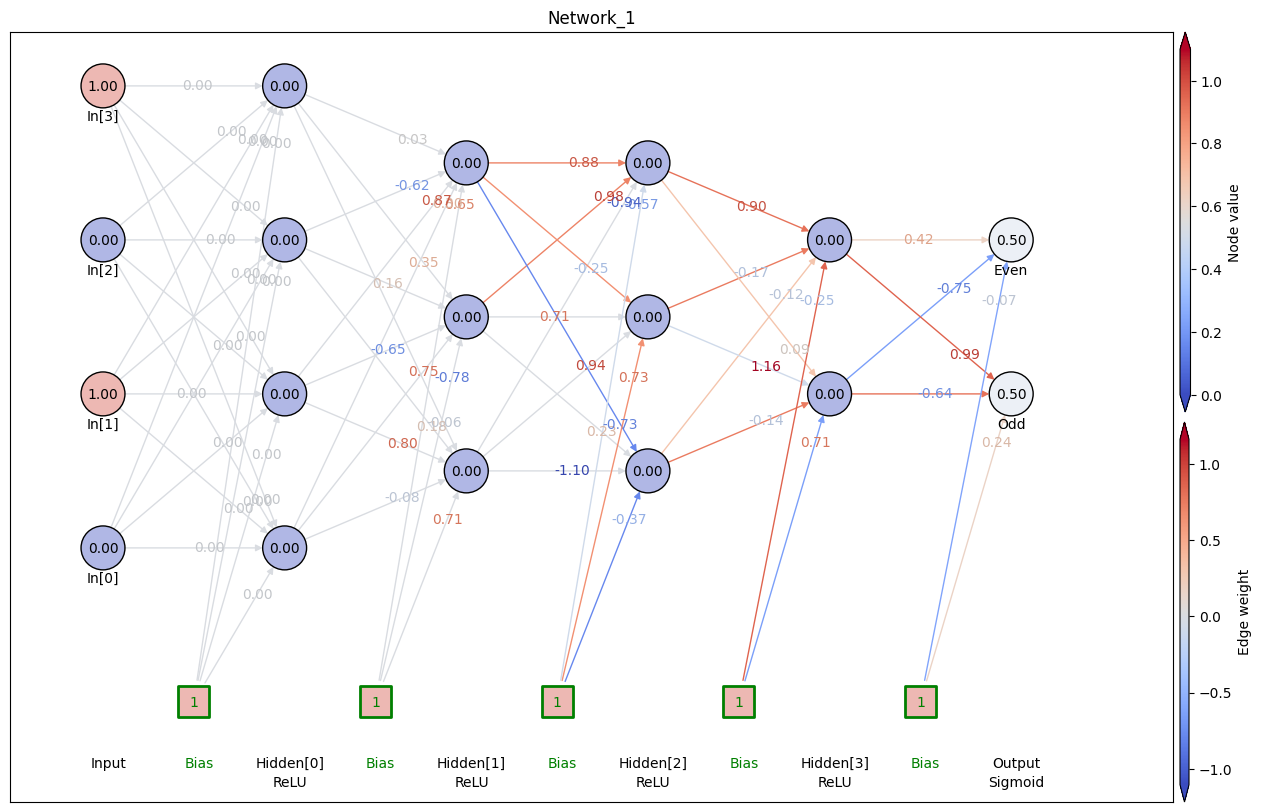

In [6]:
nx = nn.net
NetGraph(nx).draw()

In [7]:
[s.output for (d, e) in train_data for s in nx(d) if s.type == StepType.Output]

[Network_1_output(Odd=0.5, Even=0.5),
 Network_1_output(Odd=0.5, Even=0.5),
 Network_1_output(Odd=0.5, Even=0.5),
 Network_1_output(Odd=0.5, Even=0.5),
 Network_1_output(Odd=0.5, Even=0.5),
 Network_1_output(Odd=0.5, Even=0.5),
 Network_1_output(Odd=0.5, Even=0.5),
 Network_1_output(Odd=0.5, Even=0.5),
 Network_1_output(Odd=0.5, Even=0.5),
 Network_1_output(Odd=0.5, Even=0.5),
 Network_1_output(Odd=0.5, Even=0.5),
 Network_1_output(Odd=0.5, Even=0.5),
 Network_1_output(Odd=0.5, Even=0.5),
 Network_1_output(Odd=0.5, Even=0.5),
 Network_1_output(Odd=0.5, Even=0.5),
 Network_1_output(Odd=0.5, Even=0.5)]

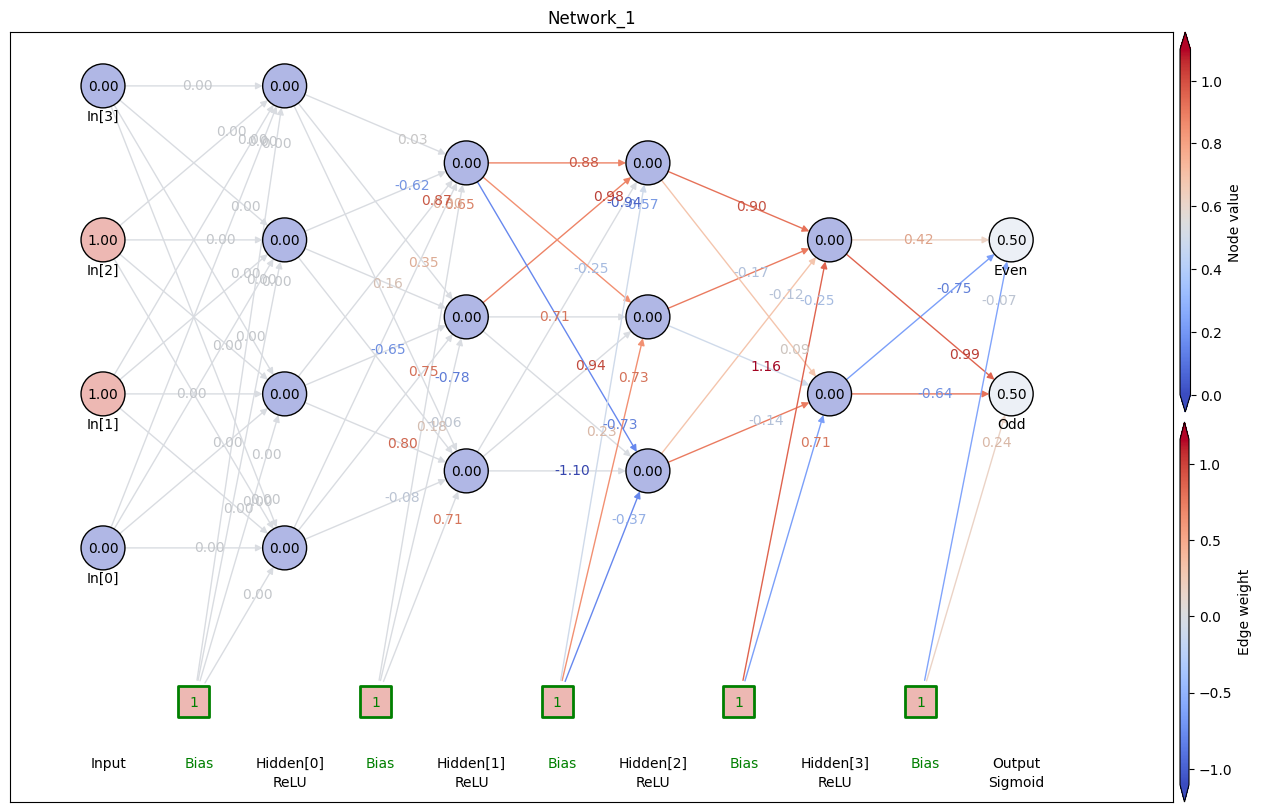

In [8]:
NetGraph(nx).draw()

## End

In [9]:
L1 = net.layers[1]